In [1]:
import numpy as np
import pandas as pd

from fcvopt.optimizers.fcvopt import FCVOpt

from pmlb import fetch_data

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# setting display resolution of plots
mpl.rcParams['figure.dpi']= 150

In [3]:
# fetch adult dataset
X, y = fetch_data('adult', return_X_y=True, local_cache_dir='data/')
print(X.shape)
print(y.shape)

(48842, 14)
(48842,)


In [4]:
clf = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=2.
    min_samples_leaf=2
)

param_bounds = {
    'learning_rate':[1e-6,1.0],
    'n_estimators':[10,10000],
    'max_depth':[1,12]
}

In [5]:
# optimizing square root of misclass rate
def sqrt_mcr(y_true,y_pred):
    return np.sqrt(1-accuracy_score(y_true,y_pred))

opt = FCVOpt(clf,param_bounds,sqrt_mcr,
             kernel="matern",
             logscale=np.array([0,1,2]),max_iter=30,
             integer = [1,2],
             seed=1,verbose=2,
             n_folds=5,n_init=4)

# tune hyperparameters
opt.run(X,y)

  iter    f_best   acq_best    sigma_f
     0 3.947e-01 2.851e-01 7.326e-02
     1 3.779e-01 2.683e-01 7.577e-02
     2 3.827e-01 2.635e-01 8.877e-02
     3 3.652e-01 2.596e-01 7.739e-02
     4 3.636e-01 2.703e-01 8.164e-02
     5 3.709e-01 2.901e-01 7.372e-02
     6 3.650e-01 2.824e-01 6.681e-02
     7 3.760e-01 2.856e-01 6.664e-02
     8 3.666e-01 2.924e-01 7.914e-02
     9 3.635e-01 2.923e-01 7.774e-02
  iter    f_best   acq_best    sigma_f
    10 3.603e-01 3.079e-01 7.329e-02
    11 3.594e-01 3.089e-01 7.566e-02
    12 3.566e-01 3.118e-01 7.773e-02
    13 3.561e-01 3.130e-01 8.563e-02
    14 3.601e-01 3.052e-01 7.667e-02
    15 3.582e-01 3.226e-01 7.437e-02
    16 3.564e-01 3.280e-01 8.147e-02
    17 3.553e-01 3.287e-01 8.152e-02
    18 3.564e-01 3.295e-01 7.489e-02
    19 3.555e-01 3.297e-01 6.822e-02
  iter    f_best   acq_best    sigma_f
    20 3.554e-01 3.361e-01 7.117e-02
    21 3.506e-01 3.367e-01 6.850e-02
    22 3.549e-01 3.357e-01 7.146e-02
    23 3.537e-01 3.368e-01 8.244

{'x_best': array([7.07930508e-03, 1.00000000e+04, 2.00000000e+03]),
 'f_best': 0.353719484951188,
 'acq_cand': 0.3450297992924513,
 'x_cand': array([2.83204137e-01, 2.33909977e+02, 3.91586421e+02])}

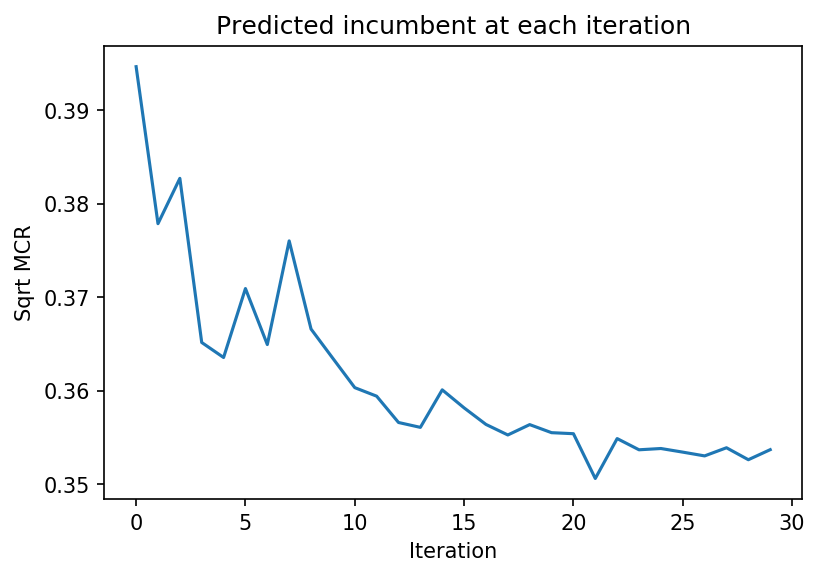

In [6]:
plt.figure()
plt.plot(opt.y_inc) # plot predicted incumbent value at each iteration
plt.xlabel('Iteration')
plt.ylabel('Sqrt MCR')
plt.title('Predicted incumbent at each iteration')
plt.show()

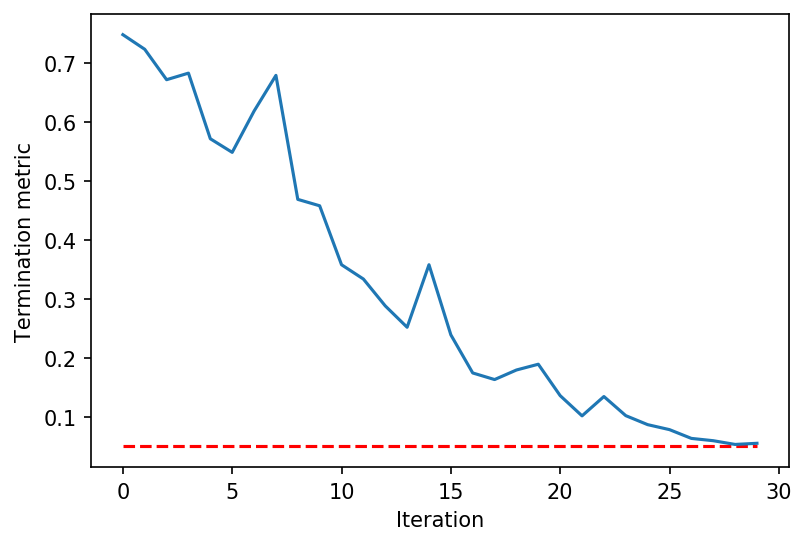

In [7]:
# plotting termination metric
plt.figure()
plt.hlines(0.05,0,opt.max_iter-1,
           linestyles="dashed",colors="red")
plt.plot(opt.term_crit())
plt.xlabel('Iteration')
plt.ylabel('Termination metric')
plt.show()

In [9]:
np.exp(opt.X)

array([[8.98460232e-05, 5.74341959e+02, 1.16130052e+03],
       [1.90278762e-03, 3.66771757e+03, 1.31911890e+01],
       [4.22214367e-06, 7.24547593e+01, 2.00039508e+00],
       [2.03341068e-01, 3.46931209e+01, 1.25488983e+02],
       [1.92075488e-02, 1.00000000e+04, 1.34703905e+01],
       [8.66258407e-03, 1.48615302e+01, 3.66345412e+01],
       [1.00000000e+00, 1.00000000e+04, 2.00000000e+00],
       [2.73302108e-01, 6.88917220e+03, 2.00000000e+03],
       [1.00000000e+00, 1.91406623e+03, 5.49434880e+00],
       [1.00000000e+00, 1.00000000e+04, 2.02549245e+02],
       [3.87248029e-05, 9.76791542e+03, 2.93378562e+00],
       [6.57240984e-02, 1.00000000e+04, 3.36826420e+00],
       [4.46129880e-01, 2.24371129e+02, 2.00000000e+00],
       [2.97801884e-02, 1.00000000e+04, 2.00000000e+00],
       [1.84576582e-01, 1.00000000e+04, 2.00000000e+00],
       [7.07930508e-03, 1.00000000e+04, 2.00000000e+03],
       [1.00000000e+00, 1.00000000e+01, 2.00000000e+00],
       [5.19939954e-02, 2.38563

In [11]:
2**12

4096